In [ ]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [ ]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [ ]:
trainlabel=traindata['label'].values

In [ ]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [ ]:
trainimages=trainimages.reshape(-1,28,28,1)

In [ ]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [ ]:
testlabel=testdata['label'].values

In [ ]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [ ]:
testimages=testimages.reshape(-1,28,28,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
traingen=ImageDataGenerator(rotation_range=40,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                  shear_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.1)

In [ ]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [ ]:
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [ ]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
# model.add(Conv2D(64,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
# model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(26,activation="softmax"))


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 128)       512       
 chNormalization)                                                
                                                        

In [ ]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [ ]:
history=model.fit(traindata_generator,epochs=60,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/60
773/773 [==============================] - 21s 20ms/step - loss: 1.2546 - accuracy: 0.6132 - val_loss: 1.2459 - val_accuracy: 0.5982
Epoch 2/60
773/773 [==============================] - 14s 19ms/step - loss: 0.4909 - accuracy: 0.8386 - val_loss: 0.5649 - val_accuracy: 0.8200
Epoch 3/60
773/773 [==============================] - 15s 19ms/step - loss: 0.3254 - accuracy: 0.8934 - val_loss: 0.3713 - val_accuracy: 0.8845
Epoch 4/60
773/773 [==============================] - 16s 21ms/step - loss: 0.2500 - accuracy: 0.9200 - val_loss: 0.6451 - val_accuracy: 0.7916
Epoch 5/60
773/773 [==============================] - 14s 19ms/step - loss: 0.2011 - accuracy: 0.9339 - val_loss: 0.2027 - val_accuracy: 0.9304
Epoch 6/60
773/773 [==============================] - 15s 19ms/step - loss: 0.1849 - accuracy: 0.9387 - val_loss: 0.2767 - val_accuracy: 0.9064
Epoch 7/60
773/773 [==============================] - 16s 20ms/step - loss: 0.1724 - accuracy: 0.9431 - val_loss: 1.4812 - val_accuracy:

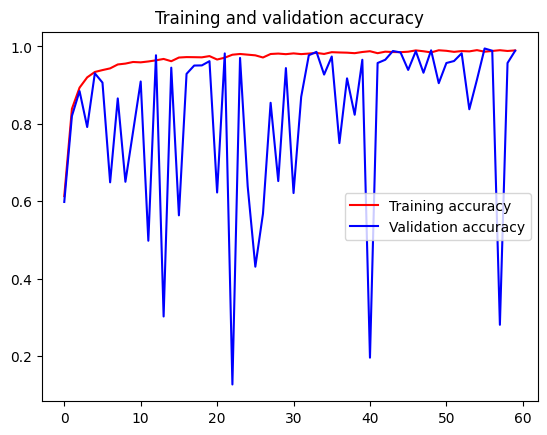

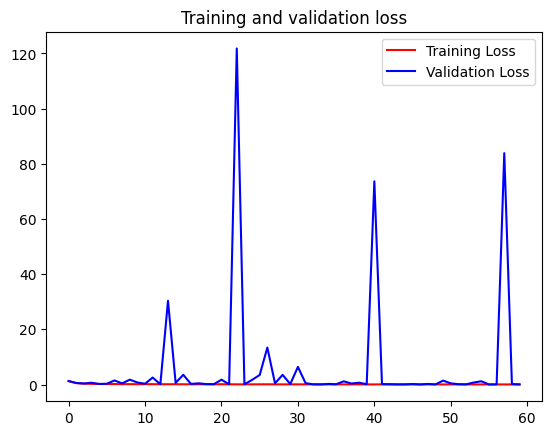

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))

<ipython-input-20-3869c0eee6ae>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))


test accuracy: 98.88455271720886
